In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import median
tips = sns.load_dataset('tips')
countries = pd.read_csv('countries-of-the-world.csv')
mpg = pd.read_csv('mpg.csv')
survey_data = pd.read_csv('young-people-survey-responses.csv')
survey_data.columns

Index(['Unnamed: 0', 'Music', 'Techno', 'Movies', 'History', 'Mathematics',
       'Pets', 'Spiders', 'Loneliness', 'Parents' advice', 'Internet usage',
       'Finances', 'Age', 'Siblings', 'Gender', 'Village - town'],
      dtype='object')

In [2]:
survey_data['Parents Advice'] = survey_data["Parents' advice"].dropna()

In [3]:
mpg_mean = (mpg.groupby(['model_year','origin'],as_index=False)['mpg'].mean()
            .rename(columns = {'model_year':'model_year','origin':'origin','mpg':'mpg_mean'}))
bins = [0,2.5,5]
categories = [False,True]
pets_int = pd.cut(survey_data['Pets'],bins = bins, labels = categories)
survey_data.insert(7,'Interested in Pets',pets_int)
likes_techno = pd.cut(survey_data['Techno'],bins=bins,labels = categories)
survey_data.insert(8,'Likes Techno',likes_techno)
survey_data['Likes Techno'] = survey_data['Likes Techno'].astype('bool')
survey_data['Interested in Pets'] = survey_data['Interested in Pets'].astype('bool')

# 1. Changing plot style and color
So far we've covered how to create a variety of different plot types. Now let's learn how to customize them.

2. Why customize?
By default, Seaborn plots are pleasing to look at, but there are several reasons you may want to change the appearance. Changing the style of a plot can be motivated by personal preference, but it can also help improve its readability or help orient an audience more quickly to the key takeaway.

3. Changing the figure style
Seaborn has five preset figure styles which change the background and axes of the plot. You can refer to them by name: "white", "dark", "whitegrid", "darkgrid", and "ticks". To set one of these as the global style for all of your plots, use the "set style" function.

4. Default figure style ("white")
This is a plot we've seen before, showing the percentage of men reporting that masculinity was important to them, stratified by their age and whether or not they feel masculine. The default style is called "white" and provides clean axes with a solid white background. If we only care about the comparisons between groups or the general trend across age groups instead of the specific values, this is a good choice.

5. Figure style: "whitegrid"
Changing the style to "whitegrid" will add a gray grid in the background. This is useful if you want your audience to be able to determine the specific values of the plotted points instead of making higher level observations.

6. Other styles
The other styles are variants on these. "ticks" is similar to "white", but adds small tick marks to the x- and y-axes.

7. Other styles
"dark" provides a gray background,

8. Other styles
and "darkgrid" provides a gray background with a white grid.

9. Changing the palette
You can change the color of the main elements of the plot with Seaborn's "set palette" function. Seaborn has many preset color palettes that you can refer to by name, or you can create your own custom palette. Let's see an example.

10. Diverging palettes
Seaborn has a group of preset palettes called diverging palettes that are great to use if your visualization deals with a scale where the two ends of the scale are opposites and there is a neutral midpoint. Here are some examples of diverging palettes - red/blue and purple/green. Note that if you append the palette name with "_r", you can reverse the palette.

11. Example (default palette)
To see this in action, let's return to a count plot we've seen before of the responses of men reporting how masculine they feel.

12. Example (diverging palette)
Setting this plot's palette to red/blue diverging provides a clearer contrast between the men who do not feel masculine and the men who do.

13. Sequential palettes
Another group of palettes are called sequential palettes. These are a single color (or two colors blended) moving from light to dark values.

14. Sequential palette example
Sequential palettes are great for emphasizing a variable on a continuous scale. One example is this plot depicting the relationship between a car's horsepower and its miles per gallon, where points grow larger and darker when the car has more cylinders.

15. Custom palettes
You can also create your own custom palettes by passing in a list of color names...

16. Custom palettes
or a list of hex color codes.

17. Changing the scale
Finally, you can change the scale of your plot by using the "set context" function. The scale options from smallest to largest are "paper", "notebook", "talk", and "poster".

18. Default context: "paper"
The default context is "paper".

19. Larger context: "talk"
You'll want to choose a larger scale like "talk" for posters or presentations where the audience is further away from the plot.

20. Let's practice!
Now that we've seen how to change the plot style, palette, and scale, let's practice!

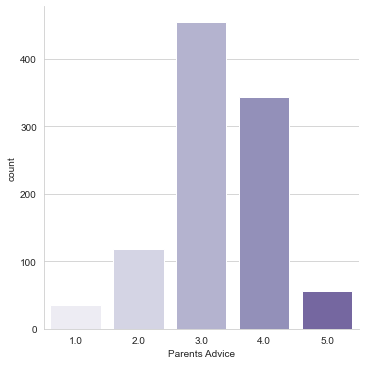

In [4]:
# Set the color palette to "Purples"
sns.set_style("whitegrid")
sns.set_palette("Purples")

# Create a count plot of survey responses


sns.catplot(x="Parents Advice", 
            data=survey_data, 
            kind="count")

# Show plot
plt.show()

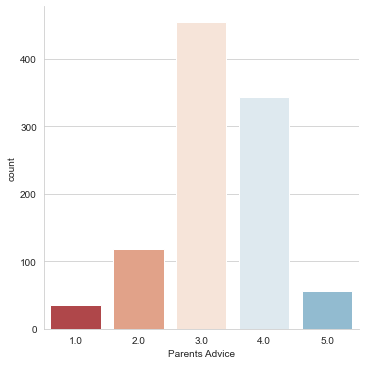

In [5]:
# Set the color palette to "Purples"
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Create a count plot of survey responses


sns.catplot(x="Parents Advice", 
            data=survey_data, 
            kind="count")

# Show plot
plt.show()

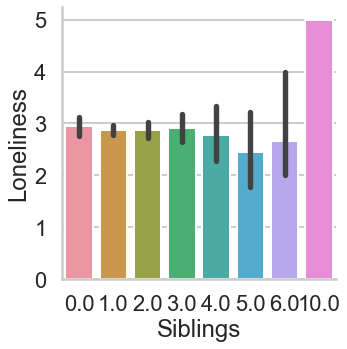

In [6]:
# Set the context to "paper"
sns.set_context("paper")
sns.set_context('notebook')
sns.set_context('talk')
sns.set_context('poster')
# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=survey_data, kind="bar")

# Show plot
plt.show()

# Using a custom palette
So far, we've looked at several things in the dataset of survey responses from young people, including their internet usage, how often they listen to their parents, and how many of them report feeling lonely. However, one thing we haven't done is a basic summary of the type of people answering this survey, including their age and gender. Providing these basic summaries is always a good practice when dealing with an unfamiliar dataset.

The code provided will create a box plot showing the distribution of ages for male versus female respondents. Let's adjust the code to customize the appearance, this time using a custom color palette.

We've already imported Seaborn as sns and matplotlib.pyplot as plt.

Instructions
0 XP
Set the style to "darkgrid".
Set a custom color palette with the hex color codes "#39A7D0" and "#36ADA4".

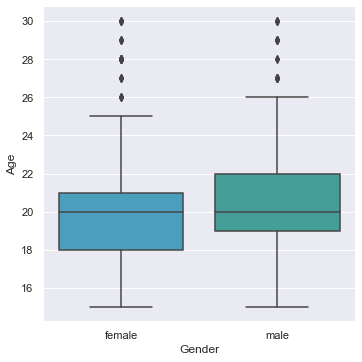

In [7]:
# Set the style to "darkgrid"
sns.set_style("darkgrid")
sns.set_context('notebook')

# Set a custom color palette
sns.set_palette(["#39A7D0", "#36ADA4"])

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age", 
            data=survey_data, kind="box")

# Show plot
plt.show()

# 1. Adding titles and labels: Part 1
Welcome! In the next two lessons, we'll go over one of the most important parts of any data visualization: plot titles and axis labels.

2. Creating informative visualizations
We create data visualizations to communicate information, and we can't do that effectively without a clear title and informative axis labels. To see this, let's compare two versions of the same visualization. On the left, we see box plots showing the distribution of birth rates for countries in each of 11 regions. On the right, we see the same visualization with three key modifications to make it easier to understand. A title is added, which immediately orients the audience to what they're looking at. The axis labels are more informative, making it clearer that birth rate is measured per one thousand people and birth rates are measured per country in each region. Finally, the x-axis tick labels are rotated to make it clear what each region is called. Let's learn how to make these changes.

3. FacetGrid vs. AxesSubplot objects
Before we go into the details of adding a title, we need to understand an underlying mechanism in Seaborn. Seaborn's plot functions create two different types of objects: FacetGrids and AxesSubplots. To figure out which type of object you're working with, first assign the plot output to a variable. In the documentation, the variable is often named "g", so we'll do that here as well. Write "type" "g" to return the object type. This scatter plot is an AxesSubplot.

4. An Empty FacetGrid
A FacetGrid consists of one or more AxesSubplots, which is how it supports subplots.

5. FacetGrid vs. AxesSubplot objects
Recall that "relplot()" and "catplot()" both support making subplots. This means that they are creating FacetGrid objects. In contrast, single-type plot functions like "scatterplot()" and "countplot()" return a single AxesSubplot object.

6. Adding a title to FacetGrid
Let's return to our messy plot from the beginning. Recall that "catplot()" enables subplots, so it returns a FacetGrid object. To add a title to a FacetGrid object, first assign the plot to the variable "g". After you assign the plot to "g", you can set the title using "g dot fig dot suptitle". This tells Seaborn you want to set a title for the figure as a whole.

7. Adjusting height of title in FacetGrid
Note that by default, the figure title might be a little low. To adjust the height of the title, you can use the "y" parameter. The default value is 1, so setting it to 1 point 03 will make it a little higher than the default.

8. Let's practice!
We'll learn how to add a title to an AxesSubplot object in the next lesson. For now, let's pause and practice what you just learned!

<class 'seaborn.axisgrid.FacetGrid'>


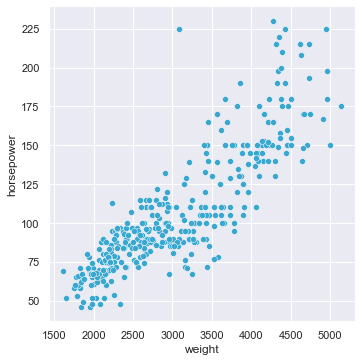

In [8]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Identify plot type
type_of_g = type(g)

# Print type
print(type_of_g)

# Adding a title to a FacetGrid object
In the previous exercise, we used `relplot()` with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This created a `FacetGrid` object. Now that we know what type of object it is, let's add a title to this plot.

We've already imported Seaborn as `sns` and `matplotlib.pyplot` as `plt`.



Add the following title to this plot: "Car Weight vs. Horsepower".


To add a title to a FacetGrid object g, use g.fig.suptitle().

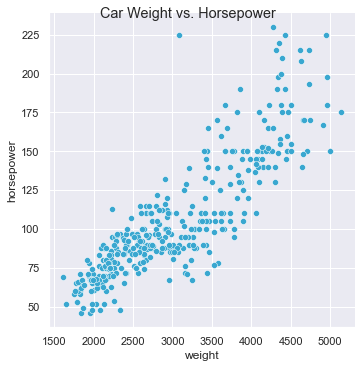

In [9]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle('Car Weight vs. Horsepower')

# Show plot
plt.show()

# 1. Adding titles and labels: Part 2
Hello! In this lesson, we'll continue learning how to customize plot titles and axis labels.

2. Adding a title to AxesSubplot
In the last lesson, we learned how to add a title to a FacetGrid object using "g dot fig dot suptitle". To add a title to an AxesSubplot object like that from the "box plot" function, assign the plot to a variable and use “g dot set_title”. You can also use the “y” parameter here to adjust the height of the title.

3. Titles for subplots
Now let's look at what happens if the figure has subplots. Let's say we've divided countries into two groups - group one and group two - and we've set "col" equal to "Group" to create a subplot for each group.

4. Titles for subplots
Since g is a FacetGrid object, using "g dot fig dot suptitle" will add a title to the figure as a whole.

5. Titles for subplots
To alter the subplot titles, use "g dot set_titles" to set the titles for each AxesSubplot. If you want to use the variable name in the title, you can use "col name" in braces to reference the column value. Here, we've created subplot titles that display as "this is group 2" and "this is group 1".

6. Adding axis labels
To add axis labels, assign the plot to a variable and then call the "set" function. Set the parameters "x label" and "y label" to set the desired x-axis and y-axis labels, respectively. This works with both FacetGrid and AxesSubplot objects.

7. Rotating x-axis tick labels
Sometimes, like in the example we've seen in this lesson, your tick labels may overlap, making it hard to interpret the plot. One way to address this is by rotating the tick labels. To do this, we don't call a function on the plot object itself. Instead, after we create the plot, we call the matplotlib function "plt dot xticks" and set "rotation" equal to 90 degrees. This works with both FacetGrid and AxesSubplot objects.

8. Let's practice!
And that's it! Now it's time to create some clear and informative visualizations!

# Adding a title and axis labels
Let's continue to look at the miles per gallon dataset. This time we'll create a line plot to answer the question: How does the average miles per gallon achieved by cars change over time for each of the three places of origin? To improve the readability of this plot, we'll add a title and more informative axis labels.

In the code provided, we create the line plot using the lineplot() function. Note that lineplot() does not support the creation of subplots, so it returns an AxesSubplot object instead of an FacetGrid object.

We've already imported Seaborn as sns and matplotlib.pyplot as plt

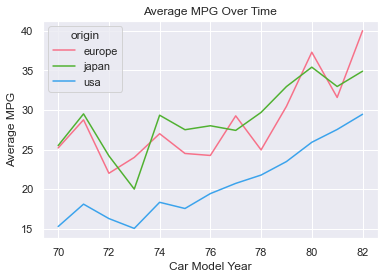

In [10]:
# Create line plot
g = sns.lineplot(x="model_year", y="mpg_mean", 
                 data=mpg_mean,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Add x-axis and y-axis labels
g.set(xlabel = 'Car Model Year',ylabel = 'Average MPG')

# Show plot
plt.show()

# Rotating x-tick labels
In this exercise, we'll continue looking at the miles per gallon dataset. In the code provided, we create a point plot that displays the average acceleration for cars in each of the three places of origin. Note that the "acceleration" variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

Let's use this plot to practice rotating the x-tick labels. Recall that the function to rotate x-tick labels is a standalone Matplotlib function and not a function applied to the plot object itself.

We've already imported Seaborn as sns and matplotlib.pyplot as plt.

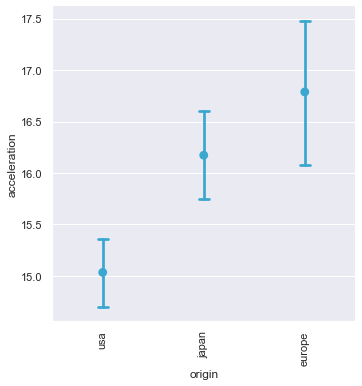

In [11]:
# Create point plot
sns.catplot(x="origin", 
            y="acceleration", 
            data=mpg, 
            kind="point", 
            join=False, 
            capsize=0.1)

# Rotate x-tick labels
plt.xticks(rotation = 90)

# Show plot
plt.show()

# 1. Putting it all together
In this course, we've learned a great deal about how to create effective data visualizations in Seaborn. In this lesson, we'll review what we've learned and connect the pieces together to form a cohesive picture of how to use Seaborn for future projects.

2. Getting started
The first thing to recall is simply how to import Seaborn and its related library, Matplotlib. To do this, write `"import seaborn as sns"` and `"import matplotlib dot pyplot as plt"`. Recall also that at the end of your data visualization code, you'll call "plt dot show" to show the visualization.

3. Relational plots
After you've imported the appropriate libraries, the next thing to do is to choose what type of plot you want to create. Relational plots are plots that show the relationship between two quantitative variables. Examples of relational plots that we've seen in this course are scatter plots and line plots. You can create a relational plot using `"relplot()"` and providing it with the x-axis variable name, y-axis variable name, the pandas tidy DataFrame, and the type of plot (either scatter or line).

4. Categorical plots
Categorical plots are another type of plot. These describe the distribution of a quantitative variable within categories given by a categorical variable. Examples of categorical plots we've seen are bar plots, count plots, box plots, and point plots. You can create a categorical plot using `"catplot()"` and providing it with the x-axis variable name, y-axis variable name (if applicable), the pandas tidy DataFrame, and the type of plot (either bar, count, box, or point).

5. Adding a third variable (hue)
If we want to add a third dimension to our plots, we can do this in one of two ways. Setting the `"hue"` parameter to a variable name will create a single plot but will show subgroups that are different colors based on that variable's values.

6. Adding a third variable (row/col)
Alternatively, you can use `"relplot()" and "catplot()"`’s `"col" and "row"` parameters to graph each subgroup on a separate subplot in the figure.

7. Customization
Once you have the basic plot created, you might want to customize the plot's appearance to improve its readability. You can change the background of the plot using `"set_style"`, the color of the main elements using `"set_palette"`, and the scale of the plot using `"set_context"`.

8. Adding a title
Finally, every plot should be given an informative title and axis labels. Recall the two types of plot objects -` FacetGrids and AxesSubplots` - and the way to add a title to each of them.

9. Final touches
Also recall how to use the `"set"` function with the `"xlabel" and "ylabel"` parameters to provide custom x- and y-axis labels, and how to use `"plt.xticks"` with the `"rotation`" parameter to rotate the x-tick labels.

10. Let's practice!
And that's it! You're now equipped to make impressive and effective data visualizations with Seaborn. Let's practice putting all of these steps together in the final exercises of this course.

### Box plot with subgroups
In this exercise, we'll look at the dataset containing responses from a survey given to young people. One of the questions asked of the young people was: "Are you interested in having pets?" Let's explore whether the distribution of ages of those answering "yes" tends to be higher or lower than those answering "no", controlling for gender.


Set the color palette to "Blues".
Add subgroups to color the box plots based on "Interested in Pets".
Set the title of the FacetGrid object g to "Age of Those Interested in Pets vs. Not".
Make the plot display using a Matplotlib function.

In [12]:
survey_data

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Interested in Pets,Likes Techno,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Parents Advice
0,0,5.0,1.0,5.0,1.0,3.0,4.0,True,False,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,4.0
1,1,4.0,1.0,5.0,1.0,5.0,5.0,True,False,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,2.0
2,2,5.0,1.0,5.0,1.0,5.0,5.0,True,False,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,3.0
3,3,5.0,2.0,5.0,4.0,4.0,1.0,False,False,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,2.0
4,4,5.0,2.0,5.0,3.0,2.0,1.0,False,False,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1005,5.0,3.0,5.0,4.0,1.0,4.0,True,True,2.0,4.0,4.0,few hours a day,3.0,20.0,1.0,female,city,4.0
1006,1006,4.0,4.0,5.0,4.0,5.0,5.0,True,True,1.0,1.0,4.0,less than an hour a day,3.0,27.0,5.0,male,village,4.0
1007,1007,4.0,1.0,4.0,2.0,3.0,5.0,True,False,2.0,4.0,4.0,most of the day,1.0,18.0,0.0,female,city,4.0
1008,1008,5.0,2.0,5.0,3.0,1.0,4.0,True,False,3.0,3.0,3.0,most of the day,3.0,25.0,1.0,female,city,3.0


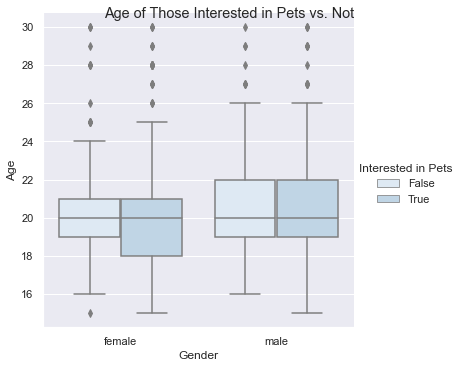

In [13]:
# Set palette to "Blues"
sns.set_palette('Blues')

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=survey_data, 
                kind="box", hue='Interested in Pets')

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle('Age of Those Interested in Pets vs. Not')

# Show plot
plt.show()

###  Bar plot with subgroups and subplots
In this exercise, we'll return to our young people survey dataset and investigate whether the proportion of people who like techno music ("Likes Techno") varies by their gender ("Gender") or where they live ("Village - town"). This exercise will give us an opportunity to practice the many things we've learned throughout this course!

We've already imported Seaborn as sns and matplotlib.pyplot as plt.

Instructions
100 XP
Set the figure style to "dark".
Adjust the bar plot code to add subplots based on "Gender", arranged in columns.
Add the title "Percentage of Young People Who Like Techno" to this FacetGrid plot.
Label the x-axis "Location of Residence" and y-axis "% Who Like Techno"

In [14]:
survey_data.dtypes

Unnamed: 0              int64
Music                 float64
Techno                float64
Movies                float64
History               float64
Mathematics           float64
Pets                  float64
Interested in Pets     object
Likes Techno           object
Spiders               float64
Loneliness            float64
Parents' advice       float64
Internet usage         object
Finances              float64
Age                   float64
Siblings              float64
Gender                 object
Village - town         object
Parents Advice        float64
dtype: object

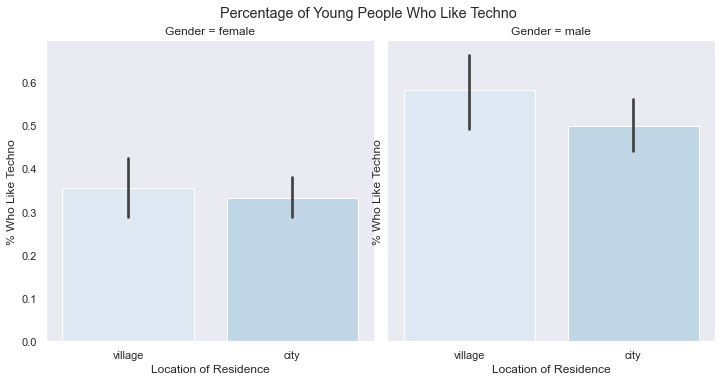

In [15]:
# Set the figure style to "dark"
sns.set_style("dark")

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Likes Techno", 
                data=survey_data, kind="bar",
                col="Gender")

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
      ylabel="% Who Like Techno")

# Show plot
plt.show()

# Got It!
1. Well done! What's next?
Congratulations on completing this introduction to Seaborn! Let's discuss the next steps you can take to build upon the skills that you've learned in this course.

2. Where does Seaborn fit in?
Seaborn is a powerful data visualization tool that allows you to create attractive and informative visualizations with just a few lines of code. Let's return to this diagram of the data analysis workflow to see where Seaborn fits in.

3. Where does Seaborn fit in?
As we've seen in our examples, Seaborn is great for both the initial exploration of your data and communicating the results at the end of your data analysis.

4. Next Steps: Explore and communicate results
In this course, we've covered the most common data visualizations used for data exploration. DataCamp has other visualization courses if you want to learn even more. For example, Seaborn also supports more advanced visualizations and analyses like linear regressions. We also learned that Seaborn was built on top of Matplotlib and practiced how to use some Matplotlib functions to customize Seaborn plots. Here, too, there are many more customizations that Matplotlib supports if you wish to learn more.

5. Next steps: Gather data
You can also learn more about the other steps of the data analysis workflow. If you wish to learn more about how to gather your data, explore courses on importing data in Python and SQL.

6. Next steps: Transform and clean
In this course, we learned that Seaborn works extremely well with tidy pandas DataFrames. There is more to learn here about how to get your data into pandas DataFrames, clean it, and transform it into a tidy format.

7. Next steps: Analyze and build models
Finally, I encourage you to learn more about statistical analysis. For example, for bar plots, Seaborn automatically calculates confidence intervals for each bar value. There is a lot to learn here about how these confidence intervals are calculated and how to interpret them.

8. Congratulations!
Though there is always more to learn, we've covered a great deal in this introduction to Seaborn. Congratulations on completing the course! I hope you enjoyed it and feel confident using Seaborn in the future for your data visualization needs.